In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# N = Number of Input Neurons
N = np.array([])
N_w1 = np.array([])
N_w2 = np.array([])
N_std_dev_w1 = np.array([])
N_std_dev_w2 = np.array([])

In [9]:
name_str='{}_input_neurons_w1_w2.npz'
sample_list = np.arange(100,500,50)

for sample in sample_list:
    data = np.load(name_str.format(sample))
    N = np.append(N, data['N'])
    N_w1 = np.append(N_w1, data['w1'])
    N_w2 = np.append(N_w2, data['w2'])
    N_std_dev_w1 = np.append(N_std_dev_w1, data['std_dev_w1_10_samples'])
    N_std_dev_w2 = np.append(N_std_dev_w2, data['std_dev_w2_10_samples'])

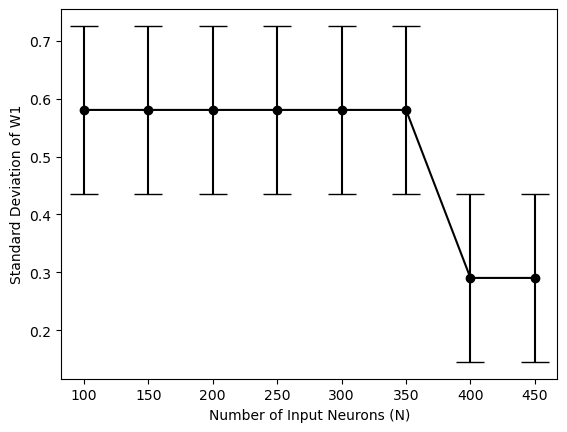

In [10]:
fig, ax = plt.subplots()
ax.scatter(N, N_w1, color="k")
ax.errorbar(N, N_w1, N_std_dev_w1, capsize = 10.0, color= "k")
ax.set_xlabel("Number of Input Neurons (N)")
ax.set_ylabel("Standard Deviation of W1")
fig.savefig("W1_vs_N.png")

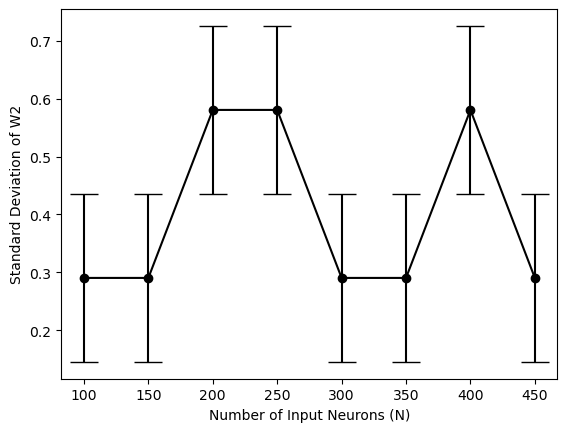

In [11]:
fig2, ax2 = plt.subplots()
ax2.scatter(N, N_w2, color="k")
ax2.errorbar(N, N_w2, N_std_dev_w2, capsize = 10.0, color= "k")
ax2.set_xlabel("Number of Input Neurons (N)")
ax2.set_ylabel("Standard Deviation of W2")
fig2.savefig("W2_vs_N.png")